# File and libraries

In [5]:
import pandas as pd
import numpy as np


filepath=r'dataset/df_ecom_2_6_bal_input'
test_filepath= f"{filepath}_test.csv"
train_filepath= f"{filepath}_train.csv"

file_tag = "Multicategory Store"

# DSLabs functions

In [6]:
%run "dslabs_functions.py"


dslabs_functions lodaded


# Data functions

In [7]:
%run "data_functions.py"


data_functions loaded


# Load

In [8]:

# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False

if test_data==True:

    df=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # sample
    df = df.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)

    # data=data.sample(frac=0.05, replace=False)
    # test=test.sample(frac=0.05, replace=False)
    # train=train.sample(frac=0.05, replace=False)
    
    
else:
    df=pd.read_csv(f"{filepath}.csv")  
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # larger sample 10%
    # data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)
    # test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)
    # train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)

 
target='is_purchase'
target_metric_2='precision'
target_metric='f2'
vars: list[str] = df.columns.to_list()
labels: list = list(df[target].unique())


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
df.sort_values(by='day', inplace=True)
test.sort_values(by='day', inplace=True)
train.sort_values(by='day', inplace=True)



df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235411 entries, 0 to 235410
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  235411 non-null  float64
 1   category_code_lvl_2  235411 non-null  float64
 2   price                235411 non-null  float64
 3   is_purchase          235411 non-null  int64  
 4   activity_in_session  235411 non-null  float64
 5   week_of_month        235411 non-null  int64  
 6   day                  235411 non-null  int64  
 7   brand_value          235411 non-null  float64
 8   product_category     235411 non-null  int64  
 9   day_of_week_sin      235411 non-null  float64
 10  day_of_week_cos      235411 non-null  float64
 11  hour_sin             235411 non-null  float64
 12  hour_cos             235411 non-null  float64
dtypes: float64(9), int64(4)
memory usage: 25.1 MB


# Distribution Check

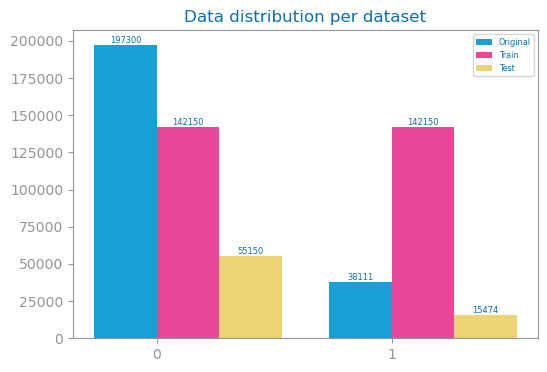

In [10]:
from pandas import concat
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_multibar_chart


# Distribution check


# Create a dictionary to store original class counts
values: dict[str, list[int]] = {
    "Original": [
        len(df[df[target] == 0]),  # Assuming 0 is the negative class
        len(df[df[target] == 1]),  # Assuming 1 is the positive class
    ]
}

values["Train"] = [
    len(train[train[target] == 0]),
    len(train[train[target] == 1]),
]
values["Test"] = [
    len(test[test[target] == 0]),
    len(test[test[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

# Model Evaluation

In [11]:
if evaluate==True:

    trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train, test, target)
    print(f'Train#={len(trnX)} Test#={len(tstX)}')
    print(f'Labels={labels}')

Train#=284300 Test#=70624
Labels=[0, 1]


# recall 

## compare params recall

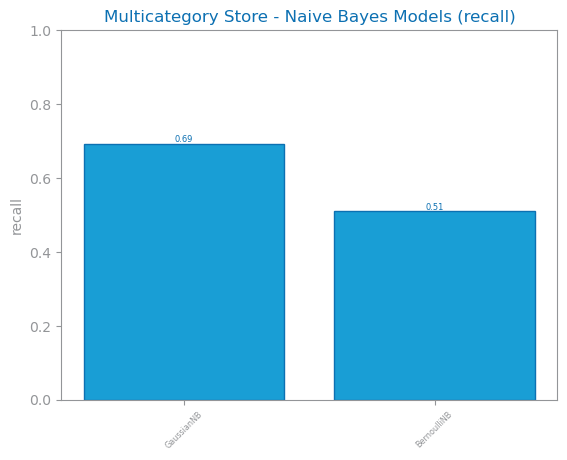

In [13]:
if evaluate==True:
    
    best_model_recall, recall_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='recall',file_tag=file_tag)
    savefig(f'images/{file_tag}_nb_recall_study.png')
    show()

## evaluate recall

<Figure size 640x480 with 0 Axes>

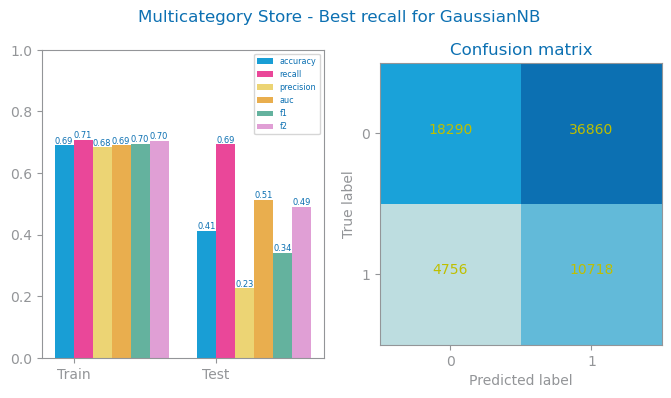

In [14]:
from dslabs_functions import plot_evaluation_results

prd_trn = best_model_recall.predict(trnX)
prd_tst = best_model_recall.predict(tstX)
figure()

plot_evaluation_results(recall_params, trnY, prd_trn, tstY, prd_tst, labels, file_tag=file_tag)
savefig(f'images/{file_tag}_nb_{recall_params["name"]}_best_{recall_params["metric"]}_eval.png')
show()

# precision

## compare params precision

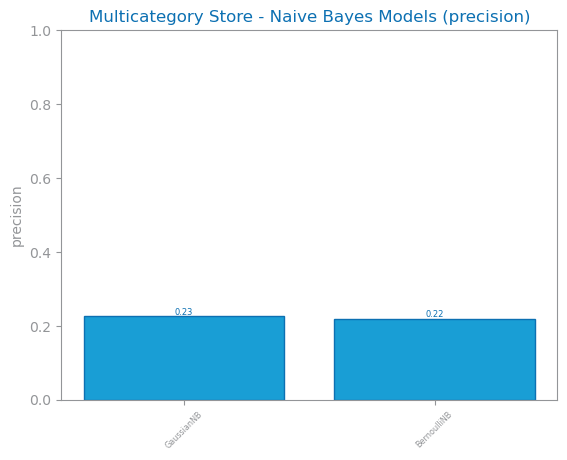

In [15]:
best_model_prec, prec_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='precision',file_tag=file_tag)
savefig(f'images/{file_tag}_nb_precision_study.png')
show()

<Figure size 640x480 with 0 Axes>

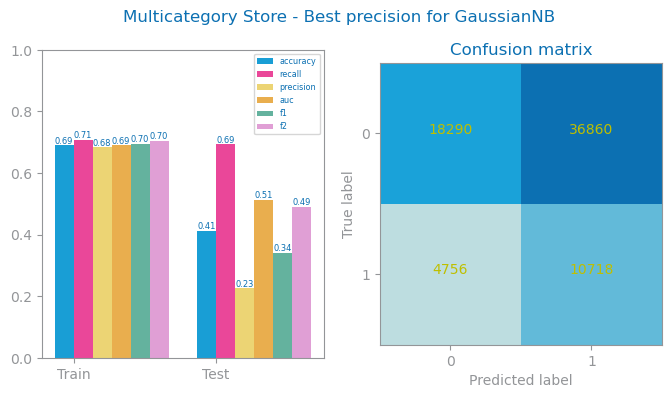

In [16]:
from dslabs_functions import plot_evaluation_results


prd_trn: array = best_model_prec.predict(trnX)
prd_tst: array = best_model_prec.predict(tstX)
figure()
plot_evaluation_results(prec_params, trnY, prd_trn, tstY, prd_tst, labels, file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{prec_params["name"]}_best_{prec_params["metric"]}_eval.png')
show()

## evaluate accuracy

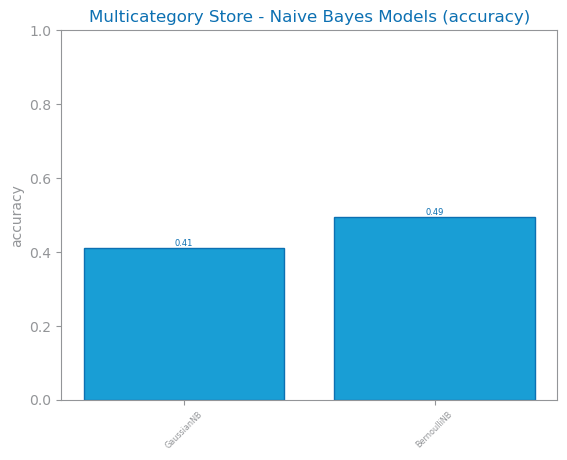

In [33]:
best_model_acc, acc_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='accuracy',file_tag=file_tag)
savefig(f'images/{file_tag}_dt_accuracy_study.png')
show()

<Figure size 640x480 with 0 Axes>

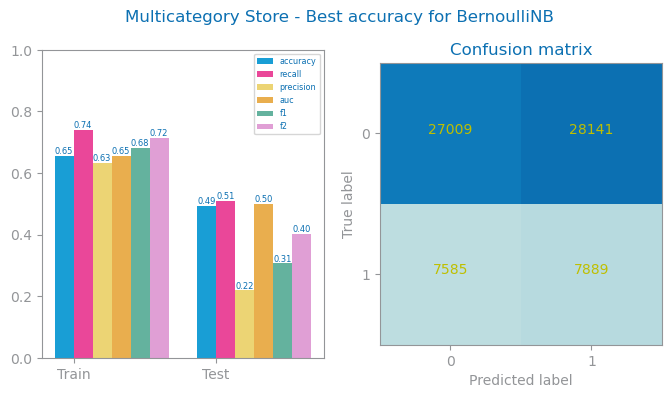

In [34]:
prd_trn: array = best_model_acc.predict(trnX)
prd_tst: array = best_model_acc.predict(tstX)
figure()
plot_evaluation_results(acc_params, trnY, prd_trn, tstY, prd_tst, labels,file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{acc_params["name"]}_best_{acc_params["metric"]}_eval.png')
show()

# f2

## compare params f2

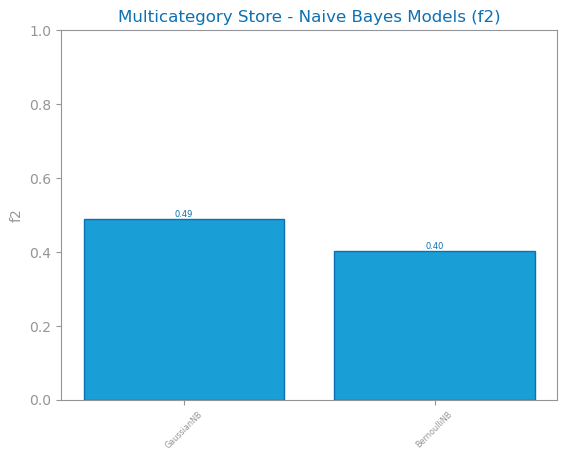

In [17]:
best_model_f2, f2_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='f2',file_tag=file_tag)
savefig(f'images/{file_tag}_nb_f2_study.png')
show()

## evaluate f2

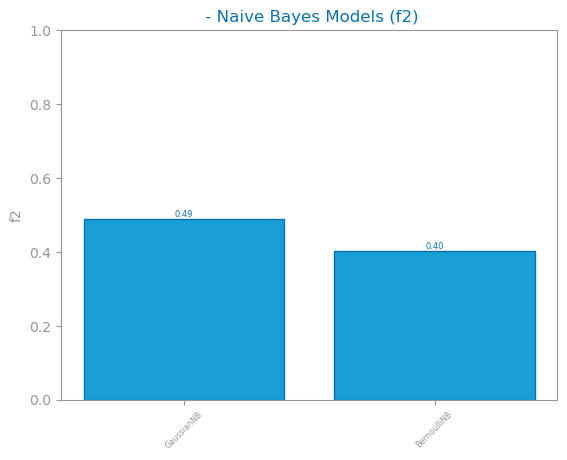

In [37]:
prd_trn: array = best_model_f2.predict(trnX)
prd_tst: array = best_model_f2.predict(tstX)
figure()
plot_evaluation_results(f2_params, trnY, prd_trn, tstY, prd_tst, labels,file_tag=file_tag)
savefig(f'images/{file_tag}_nb_{f2_params["name"]}_best_{f2_params["metric"]}_eval.png')
show()

<Figure size 640x480 with 0 Axes>

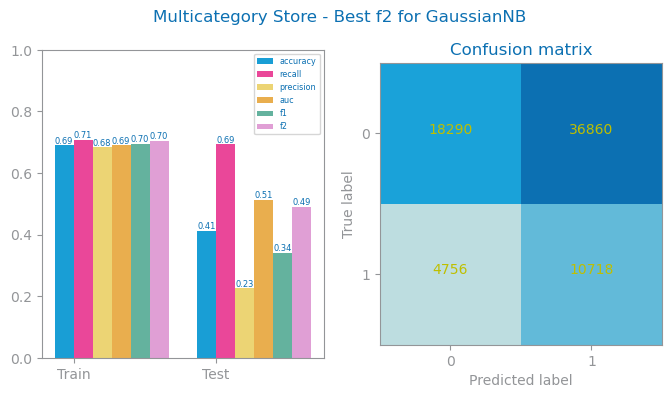

In [20]:
prd_trn: array = best_model_f2.predict(trnX)
prd_tst: array = best_model_f2.predict(tstX)
figure()
plot_evaluation_results(f2_params, trnY, prd_trn, tstY, prd_tst, labels,file_tag=file_tag)
savefig(f'images/{file_tag}_nb_{f2_params["name"]}_best_{f2_params["metric"]}_eval.png')
show()

# Overfitting

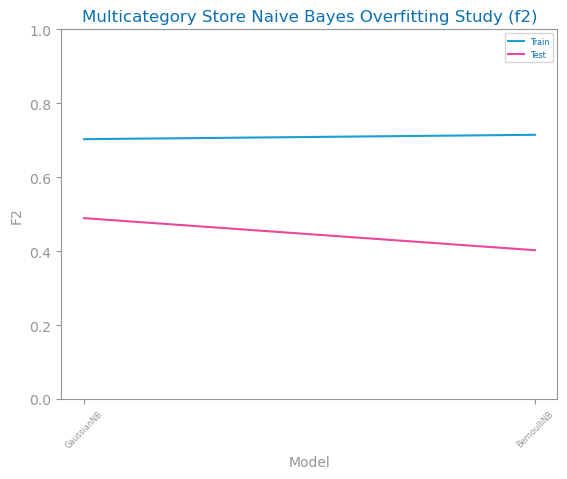

In [40]:
from matplotlib.pyplot import figure, savefig
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Define Naive Bayes models
nb_models = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
}

# Choose your metric name as a string
acc_metric = "f2"  # Or any other metric you want to use

y_tst_values = {}
y_trn_values = {}

# Iterate through each Naive Bayes model and evaluate performance on train and test sets
for name, model in nb_models.items():
    model.fit(trnX, trnY)
    
    # Predictions for train and test sets
    prd_trn_Y = model.predict(trnX)
    prd_tst_Y = model.predict(tstX)
    
    # Dynamically call the selected metric from CLASS_EVAL_METRICS by name
    trn_metric_value = CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y)
    tst_metric_value = CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y)
    
    # Store values for plotting
    y_trn_values[name] = trn_metric_value
    y_tst_values[name] = tst_metric_value

# Plotting overfitting study
figure()
plot_multiline_chart(
    list(nb_models.keys()),  # x-axis labels (model names)
    {"Train": list(y_trn_values.values()), "Test": list(y_tst_values.values())},
    title=f"{file_tag} Naive Bayes Overfitting Study ({acc_metric})",
    xlabel="Model",
    ylabel=acc_metric.capitalize(),  # Use the metric name as the label
    percentage=True,  # Set to False if your metric is not in percentage
)
savefig(f"images/{file_tag}_nb_overfitting_{acc_metric}.png")
show()


# Analysis



Precision/recall/ f2 study:
- recall KNN best with K=5
- Precision KNN best with  K=5
- f2 KNN best with K=3

Logic for evaluation:
- Our goal is to maximize true positives (high recall) while minimizing false positives (high precision). This approach enables us to effectively identify customers who are likely to purchase, focusing our marketing efforts on those most likely to convert. By reducing false positives, we also avoid unnecessary spending on campaigns targeted at users who are unlikely to buy.

- The F2 score, which places more emphasis on recall than precision, is the best metric to evaluate this balance. During the evaluation phase, we will assess model performance primarily using the F2 score, analyzing precision and recall together. Our objective is to achieve a balanced score that allows us to identify as many potential buyers as possible, while keeping false positives low to optimize our marketing budget.

Dataset used:
- Complete dataset from balancing step was used.

Estimators:
- There's 3 estimators available in NB:
    - GaussianNB
    - MultinomialNB
    - BernoulliNB
We didn't use the MultinomialNB, because this estimator doesn't work over variables with negative values, and in our dataset we have variables with negative values like the time cols: time_of_day_sin, time_of_day_cos,day_of_week_sin, day_of_week_cos,	hour_sin, hour_cos, min_sin and min_cos.


Best params:
- I our dataset, using the precision measure, the best model found was the one using Bernoulli (29 vs 27). For f2, the the best model found was also the one using Bernoulli (58 vs 56), making Bernoulli the best estimator for our dataset.
- The best model for f2, tem uma precision de 23%, sendo um dos modelos menos eficientes do que estudámos para o nosso dataset. Estem odelo teve tmabém um recall de 69%. Estes dois resultados significam que temos um numero até bastante elevado de true positive, mas no entanto temos um numero muito elevado de falsos positivos que é precisamente aquilo que nao queremos.


## Extended analysis

- There are three available estimators in Naive Bayes: GaussianNB, MultinomialNB, and BernoulliNB. We didn’t use MultinomialNB because it doesn’t handle variables with negative values. Our dataset includes negative values in time-based features such as time_of_day_sin, time_of_day_cos, day_of_week_sin, day_of_week_cos, hour_sin, hour_cos, min_sin, and min_cos.

- For our dataset, using precision as the measure, the Bernoulli model performed best (29% vs. 27% in other models). For F2, Bernoulli was also the top performer (58% vs. 56%). This makes Bernoulli the most suitable estimator for our data.

- The best F2 model achieved a precision of 23%, making it one of the less efficient models for our dataset, with a recall of 69%. This shows a relatively high number of true positives but also a high number of false positives, which we aim to minimize.

## Short analysis for the report
- BernoulliNB was best for our dataset, outperforming Gaussian in precision (29%) and F2 (58%). The top F2 model had a score of 23% for precision and 69% forrecall, with many true positives but also too many false positives.

# Short logic evaluation text:
- Our goal is to maximize true positives (high recall) and minimize false positives (high precision), effectively targeting likely buyers and reducing wasted marketing spend. The F2 score, emphasizing recall, will be our primary evaluation metric, helping us strike a balance between precision and recall to optimize campaign efficiency